In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
# population mean
population_mean = df['CPM'].mean()
print("population_mean: {}".format(population_mean))

population_mean: 2.1001980853085906


In [4]:
sample_size = 1000
sample = np.random.choice(a = df['CPM'], size = sample_size)
sample_mean= sample.mean()

z_critical = stats.norm.ppf(q = 0.975)

print("z critical:{} ".format(z_critical))

pop_stddev = df['CPM'].std()

margin_of_error = z_critical * (pop_stddev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("confidence interval : {}".format(confidence_interval))

z critical:1.959963984540054 
confidence interval : (1.7916468988924974, 2.5540158713599412)


#### Lets plot several confidence intervals and plot them

In [5]:
np.random.seed(100)

sample_size = 1000
intervals = []
sample_means = []

for samples in range(25):
    sample = np.random.choice(df['CPM'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    z_critical = stats.norm.ppf(q = 0.975)
    pop_stddev = df['CPM'].std()
    
    margin_of_error = z_critical * (pop_stddev/math.sqrt(sample_size))
    
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    intervals.append(confidence_interval)

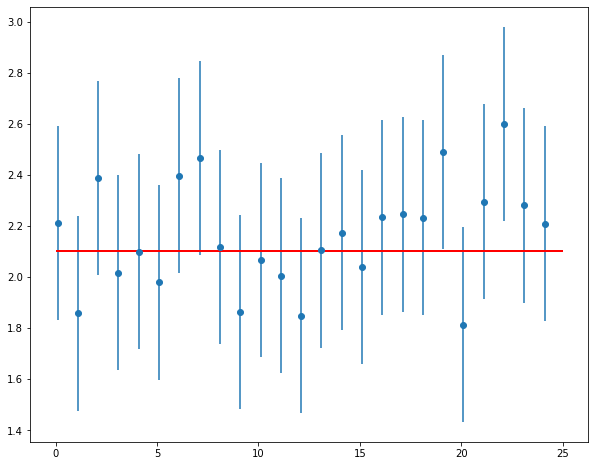

In [6]:
# plot the confidence intervals
plt.figure(figsize=(10, 8))

plt.errorbar(x = np.arange(0.1, 25, 1),
            y = sample_means,
            yerr = [(top - bot)/2 for bot,top in intervals],
            fmt = 'o')


plt.hlines(xmin = 0, xmax = 25,
          y = population_mean,
          linewidth = 2.0,
          color = 'red')

plt.show()

#### Take smaller sample size and create confidence interval without population stddev using t critical value

In [7]:
np.random.seed(100)

sample_size = 25
sample = np.random.choice(df['CPM'], size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df = 24)
print("t_critical: {}".format(t_critical))
sample_stddev = sample.std(ddof = 1)
sigma = sample_stddev/math.sqrt(sample_size)
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("confidence interval:{} ".format(confidence_interval))

t_critical: 2.0638985616280205
confidence interval:(0.6439708297498693, 1.040982901851862) 


In [8]:
# confidence interval with t-distribution
stats.t.interval(alpha = 0.95, df = 24, loc = sample_mean, scale = sigma)

(0.6439708297498693, 1.040982901851862)

In [9]:
# confidence intval with z distribution
stats.norm.interval(alpha = 0.95, loc = sample_mean, scale = sigma)

(0.6539672710914897, 1.0309864605102417)

#### Hypothesis testing
- H0: The sample is from the population of CPM.
- Ha: The sample is not from the population of CPM.

In [10]:
z_critical = 1.96
sample_size = 10
sample = np.random.choice(a = df['CPM'], size = sample_size)
x_bar = sample.mean()
sigma = df['CPM'].std(ddof=0)
SE = sigma/(np.sqrt(sample_size))
mu = df['CPM'].mean()
z_stat = (x_bar - mu)/SE
print(z_stat)

-0.49057621397787793


- z_stat < z_critical so we accept H0.
- The sample is from the Population of CPM

In [11]:
df.head()

,Line Item ID,Date,App/URL ID,ISP or Carrier ID,Device Type,Exchange ID,Operating System,Browser,Creative Size,Advertiser Currency,Impressions,IO_ID,CPM
0,2,17-08-2020,1.5164E+11,1000,Desktop,1,Macintosh,Chrome,728x90,CAD,2,1,0.0105
1,2,17-08-2020,1362605575,1000,Desktop,1,Windows 10,Chrome,300x600,CAD,2,1,0.0125
2,2,17-08-2020,20303819748,207,Desktop,1,Windows 7,Chrome,160x600,CAD,2,1,0.0200
3,2,17-08-2020,20303819748,666,Desktop,1,Windows 10,Chrome,160x600,CAD,2,1,0.0350
4,2,17-08-2020,20303819748,1000,Desktop,1,Windows 10,Chrome,160x600,CAD,4,1,0.0220


## CHI-squared test

### Does the distribution of browsers in Desktops differ from the rest of the population
- H0: Distribution of App/URL ID in Desktops is the same as the rest of the population
- Ha: Distribution of App/URL ID in Desktops is not the same as the rest of the population

In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats

population = df['Advertiser Currency']
desktop = df[df['Device Type'] == 'Desktop']['Advertiser Currency']

population_table = pd.DataFrame(population.value_counts())
desktop_table = pd.DataFrame(desktop.value_counts())

observed = desktop_table
population_ratios = pd.DataFrame(population.value_counts(normalize = True))
expected = population_ratios * len(desktop)

In [13]:
stats.chisquare(f_obs=observed, f_exp=expected)

ValueError: operands could not be broadcast together with shapes (2,1) (3,1) 

### One-way ANOVA
- This tests whether the mean of a numerical variable differs across the levels of a categorical variable
- Uses "f" distribution

In [97]:
df.columns = ['line_item_id', 'date', 'app_url_id', 'isp_or_carrier_id',
       'device_type', 'exchange_id', 'operating_system', 'browser',
       'creative_size', 'advertiser_currency', 'impressions', 'io_id', 'cpm']

In [98]:
df.head()

,line_item_id,date,app_url_id,isp_or_carrier_id,device_type,exchange_id,operating_system,browser,creative_size,advertiser_currency,impressions,io_id,cpm
0,2,17-08-2020,1.5164E+11,1000,Desktop,1,Macintosh,Chrome,728x90,CAD,2,1,0.0105
1,2,17-08-2020,1362605575,1000,Desktop,1,Windows 10,Chrome,300x600,CAD,2,1,0.0125
2,2,17-08-2020,20303819748,207,Desktop,1,Windows 7,Chrome,160x600,CAD,2,1,0.0200
3,2,17-08-2020,20303819748,666,Desktop,1,Windows 10,Chrome,160x600,CAD,2,1,0.0350
4,2,17-08-2020,20303819748,1000,Desktop,1,Windows 10,Chrome,160x600,CAD,4,1,0.0220


In [104]:
df['cpm_log'] = np.log(df['cpm'])

In [105]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('cpm_log ~ device_type', data = df).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

model = ols('cpm_log ~ isp_or_carrier_id', data = df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

model = ols('cpm_log ~ exchange_id', data = df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

model = ols('cpm_log ~ operating_system', data = df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

model = ols('cpm_log ~ browser', data = df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

model = ols('cpm_log ~ creative_size', data = df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

model = ols('cpm_log ~ io_id', data = df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                   sum_sq         df             F  PR(>F)
device_type  4.998766e+04        3.0  16321.439396     0.0
Residual     1.426216e+06  1397019.0           NaN     NaN
                         sum_sq         df            F  PR(>F)
isp_or_carrier_id  7.049202e+03        1.0  6703.093817     0.0
Residual           1.469155e+06  1397021.0          NaN     NaN
                   sum_sq         df            F         PR(>F)
exchange_id  1.103110e+03        1.0  1044.720533  4.157081e-229
Residual     1.475101e+06  1397021.0          NaN            NaN
                        sum_sq         df           F  PR(>F)
operating_system  6.562652e+04       66.0  984.739073     0.0
Residual          1.410578e+06  1396956.0         NaN     NaN
                sum_sq         df            F  PR(>F)
browser   2.455497e+04       20.0  1181.530284     0.0
Residual  1.451649e+06  1397002.0          NaN     NaN
                     sum_sq         df             F  PR(>F)
creative_size  9.735524e